In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import os
from matplotlib.image import imread
import random
import matplotlib.image as mpimg
import PIL
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [2]:
images = []
imagesByCategory = {}

In [37]:
import os

main_directory = 'C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images'
main_directory_glob = 'C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images/*/*'

images = []
imagesByCategory = {}
#
# for dirpath, dirnames, filenames in os.walk(main_directory):
#     for filename in filenames:
#         images.append(os.path.join(dirpath, filename))
#
#         category = dirpath.split('\\')[-1]
#         if category not in imagesByCategory:
#             imagesByCategory[category] = [os.path.join(dirpath, filename)]
#         else:
#             imagesByCategory[category].append(os.path.join(dirpath, filename))
#
# print(images)
# print(imagesByCategory)

In [38]:
for dirpath, dirnames, filenames in os.walk(main_directory):
    for filename in filenames:
        images.append(os.path.join(dirpath, filename))

        category = dirpath.split('\\')[-1]
        if category not in imagesByCategory:
            imagesByCategory[category] = (os.path.join(dirpath, filename),)
        else:
            imagesByCategory[category] += (os.path.join(dirpath, filename),)

In [8]:
datagen = ImageDataGenerator(rotation_range=10,
                             rescale = 1./255,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False,
                             zoom_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.8, 1.2],
                             fill_mode='nearest',
                             validation_split=0.2  # set validation split to 20%
                             )

In [9]:
trainimagedata = datagen.flow_from_directory("C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images",
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             target_size=(64,64),
                                             subset = 'training'
                                             )

testimagedata = datagen.flow_from_directory("C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images",
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            target_size=(64,64),
                                            subset = 'validation'
                                            )

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [22]:
X_train = tf.keras.utils.image_dataset_from_directory(
    main_directory,
    validation_split=0.2,
    subset='training',
    seed=7878,
    image_size=(180, 180),
    batch_size=32
)
X_test = tf.keras.utils.image_dataset_from_directory(
    main_directory,
    validation_split=0.2,
    subset='validation',
    seed=78,
    image_size=(180, 180),
    batch_size=32
)

Found 360 files belonging to 9 classes.
Using 288 files for training.
Found 360 files belonging to 9 classes.
Using 72 files for validation.


In [23]:
class_names = X_train.class_names

In [24]:
class_names

['apple fruit',
 'banana fruit',
 'cherry fruit',
 'chickoo fruit',
 'grapes fruit',
 'kiwi fruit',
 'mango fruit',
 'orange fruit',
 'strawberry fruit']

FileNotFoundError: [Errno 2] No such file or directory: 'C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images\\Image_19.jpg'

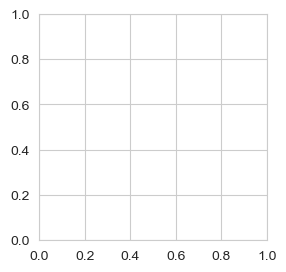

In [30]:
# fig = plt.figure(figsize=(10, 10))
# for i, class_name in enumerate(class_names):
#     class_directory = os.path.join(main_directory, class_name)
#     image_files = os.listdir(class_directory)
#     random_image = random.choice(image_files)
#     image_path = os.path.join(main_directory, random_image)
#     ax = fig.add_subplot(3, 3, i + 1)
#     img = mpimg.imread(image_path)
#     ax.imshow(img)
#     ax.set_title(class_name)
#     ax.axis('off')
#     break
# plt.tight_layout()
# plt.show()

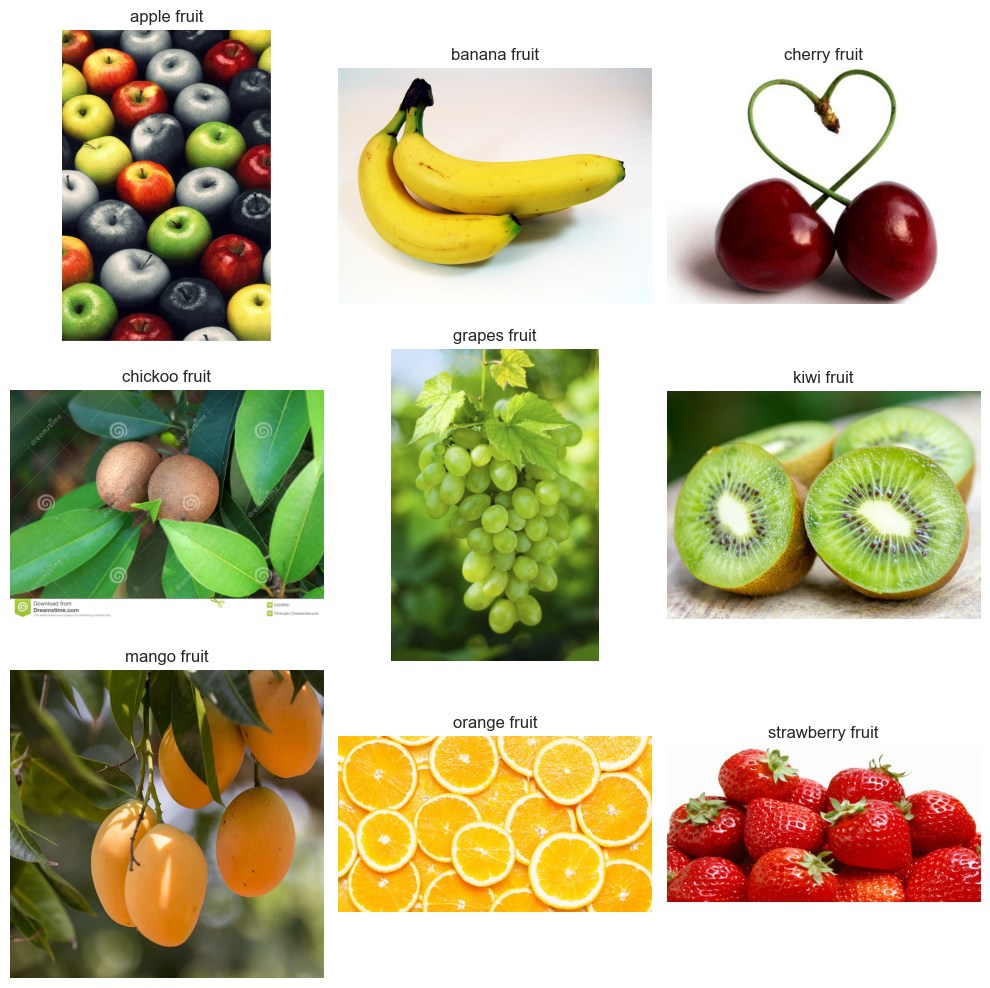

In [41]:
fig = plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    random_image = random.choice(imagesByCategory[class_name])
    image_path = os.path.join(main_directory, random_image)
    ax = fig.add_subplot(3, 3, i + 1)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [34]:
print(imagesByCategory[class_name][0])

C:/textbooks/SW/practice/fruits_nn/fruts_dataset/images\apple fruit\Image_1.jpg
